## Libraries Import

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
# @title Load iris

iris = px.data.iris()

print("--- Iris Dataset Head ---")
display(iris.head())

print("\n--- Iris Dataset Info ---")
iris.info()

print("\n--- Iris Dataset Description (Numerical Features) ---")
display(iris.describe())

print("\n--- Species Count ---")
display(iris['species'].value_counts())



--- Iris Dataset Head ---


,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1



--- Iris Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
 5   species_id    150 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB

--- Iris Dataset Description (Numerical Features) ---


,sepal_length,sepal_width,petal_length,petal_width,species_id
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,2.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,1.000000
25%,5.100000,2.800000,1.600000,0.300000,1.000000
50%,5.800000,3.000000,4.350000,1.300000,2.000000
75%,6.400000,3.300000,5.100000,1.800000,3.000000
max,7.900000,4.400000,6.900000,2.500000,3.000000



--- Species Count ---


,count
species,
setosa,50
versicolor,50
virginica,50


## Univariate Analysis

Numerical Features: sepal_length, sepal_width, petal_length, petal_width

### Numeric

In [ ]:
# @title Histogram
# Resource - https://plotly.com/python/histograms/

fig = px.histogram(iris, x='sepal_length', title='Sepal Length Distribution')
fig.show()

fig = px.histogram(iris, x='sepal_width', title='Sepal Width Distribution')
fig.show()

fig = px.histogram(iris, x='petal_length', title='Petal Length Distribution')
fig.show()

fig = px.histogram(iris, x='petal_width', title='Petal Width Distribution')
fig.show()

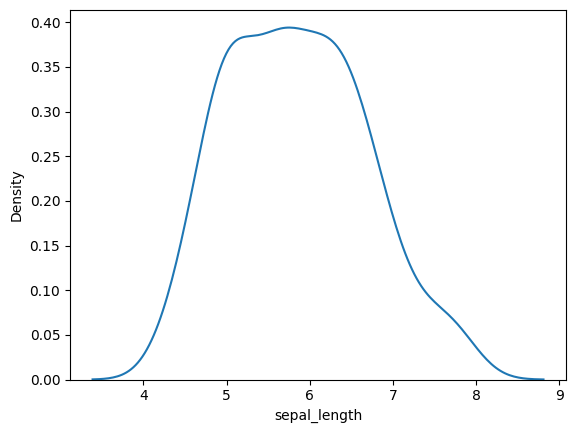

In [ ]:
# @title Kernel Density Estimation plot

import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(data=iris, x="sepal_length")
plt.show()


In [ ]:
# @title Boxplot
# to show central tendency, quartiles, and outliers

fig = px.box(iris, y='sepal_length', title='Sepal Length Box Plot')
fig.show()

fig = px.box(iris, y='sepal_width', title='Sepal Width Box Plot')
fig.show()

fig = px.box(iris, y='petal_length', title='Petal Length Box Plot')
fig.show()

fig = px.box(iris, y='petal_width', title='Petal Width Box Plot')
fig.show()

In [ ]:
# @title Violin plots
# Resource - https://plotly.com/python/violin/

fig = px.violin(
    iris,
    y='sepal_length',
    title='Sepal Length Violin Plot',
    points='all',
    box=True
)
fig.show()

# fig = px.violin(iris, y='sepal_width', title='Sepal Width Violin Plot')
# fig.show()

# fig = px.violin(iris, y='petal_length', title='Petal Length Violin Plot')
# fig.show()

# fig = px.violin(iris, y='petal_width', title='Petal Width Violin Plot')
# fig.show()

### Categorical

In [ ]:
# @title Frequency plot

fig = px.histogram(iris, x='species', title='Species Count')
fig.show()

In [ ]:
# @title Pie Chart

px.pie(iris, "species")

## Bivariate Analysis

### Numerical Numerical

In [ ]:
# @title Scatter Plot

# Scatter plot of Sepal Length vs. Sepal Width, colored by Species (interactive)
fig = px.scatter(iris, x='sepal_length', y='sepal_width', color='species',
                 title='Sepal Length vs. Sepal Width by Species')
fig.show()

# Scatter plot of Petal Length vs. Petal Width, colored by Species (interactive)
fig = px.scatter(iris, x='petal_length', y='petal_width', color='species',
                 title='Petal Length vs. Petal Width by Species')
fig.show()



In [ ]:
# @title Scatter Plot (with marginal plots)

# You can add marginal plots to scatter plots
fig = px.scatter(iris, x='sepal_length', y='sepal_width', color='species',
                 marginal_y="violin", marginal_x="box",
                 title='Sepal Length vs. Sepal Width with Marginal Plots')
fig.show()

In [ ]:
# @title Correlation matrix
# (using plotly.graph_objects or px.imshow)

correlation_matrix = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].corr()
print("\n--- Correlation Matrix ---")
print(correlation_matrix)

# Heatmap of the correlation matrix
# fig = go.Figure(data=go.Heatmap(
#     z=correlation_matrix.values,
#     x=correlation_matrix.columns,
#     y=correlation_matrix.index,
#     colorscale='RdBu', # Red-Blue colormap, good for correlations
#     zmin=-1, zmax=1,
#     text=correlation_matrix.round(2).values.astype(str), # Add text labels
#     texttemplate="%{text}",
#     hoverinfo='x+y+z'
# ))
# fig.update_layout(title='Correlation Heatmap of Iris Features')
# fig.show()


# Alternative heatmap with px.imshow (simpler syntax)
fig = px.imshow(
    correlation_matrix,
    text_auto=True,
    aspect="auto",
    title='Correlation Heatmap of Iris Features'
)
fig.show()


--- Correlation Matrix ---
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000


### Numerical Categorical

In [ ]:
# @title Box plot

fig = px.box(iris, x='species', y='sepal_length', title='Sepal Length by Species', color="species")
fig.show()

# fig = px.box(iris, x='species', y='sepal_width', title='Sepal Width by Species')
# fig.show()

# fig = px.box(iris, x='species', y='petal_length', title='Petal Length by Species')
# fig.show()

# fig = px.box(iris, x='species', y='petal_width', title='Petal Width by Species')
# fig.show()


In [ ]:
# @title Violin plot

# Violin plot of numerical features by Species (interactive)
fig = px.violin(iris, x='species', y='sepal_length', box=True, points="all",
                title='Sepal Length by Species (Violin Plot)', color="species")
fig.show()

# fig = px.violin(iris, x='species', y='sepal_width', box=True, points="all",
#                 title='Sepal Width by Species (Violin Plot)')
# fig.show()

# fig = px.violin(iris, x='species', y='petal_length', box=True, points="all",
#                 title='Petal Length by Species (Violin Plot)')
# fig.show()

# fig = px.violin(iris, x='species', y='petal_width', box=True, points="all",
#                 title='Petal Width by Species (Violin Plot)')
# fig.show()

### Categorical Categorical

In [ ]:
# @title Crosstab

# adding dummy categorical column
iris2 = iris.copy()
iris2['species2'] = iris2['species_id'].sample(frac=1, random_state=42).reset_index()['species_id']

# display(iris2.head(10))
display(pd.crosstab(iris2['species'], iris2['species2']))

fig = px.histogram(
    iris2,
    x='species',
    color='species2',
    title='Counts by Two Categories',
)

fig.show()

species2,1,2,3
species,,,
setosa,19,15,16
versicolor,18,17,15
virginica,13,18,19


## Multi Variate Analysis

In [ ]:
# @title Box Plot
fig = px.box(
    iris2,#.query("product == 'KP281'"),
    x='species',
    y='sepal_length',
    color="species2",
    title="species vs specises2",
    points='all'
    # facet_row="species2"
)
fig.show()

In [ ]:
# @title Scatter Matrix

fig = px.scatter_matrix(
    iris,
    dimensions=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
    color='species',
    title='Pair Plot of Iris Dataset by Species',
)
# skip upper half of scatter matrix
fig.update_traces(diagonal_visible=False, showupperhalf=False)

fig.show()

In [ ]:
# @title 3D scatter plot
fig = px.scatter_3d(
    iris,
    x='sepal_length',
    y='sepal_width',
    z='petal_length',
    color='species',
    title='3D Scatter Plot of Iris Features by Species'
)
fig.show()


## Additional Resources
- All plots in [plotly](https://plotly.com/python/plotly-express/)
- Different visualization techniques based on [data](https://www.data-to-viz.com/)
- Codes to make different [plots](https://python-graph-gallery.com/) in python